<a href="https://colab.research.google.com/github/Rubnserrano/TF-Certification/blob/main/02_curso_tensorflow_certificate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)
circles = pd.DataFrame({"X0": X[:,0], 'X1':X[:,1], 'label':y})
print(circles.label.value_counts())
circles.head()


1    500
0    500
Name: label, dtype: int64


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


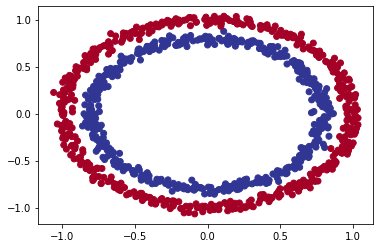

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

# Input and output shape

In [6]:
X.shape, y.shape

#This means our neural network input shape will has to accept a tensor with at least one dimension being two and output a tensor with at least one value

((1000, 2), (1000,))

# *First model*

In [7]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

model1.fit(X, y, epochs=5)
#50% is like a naive model

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [8]:
model1.fit(X,y, epochs=100, verbose=0)
model1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

In [9]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),

])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
model2.fit(X,y, epochs=100, verbose=0)
model2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5020


[0.6950902938842773, 0.5019999742507935]

In [10]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


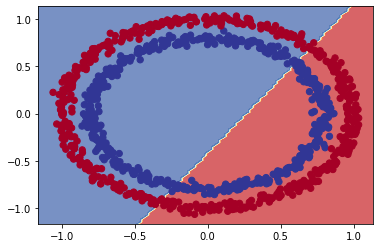

In [11]:
plot_decision_boundary(model2, X,y)

# Non-linearity

In [12]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model3.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

history = model3.fit(X,y, epochs=100, verbose=0)
model3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


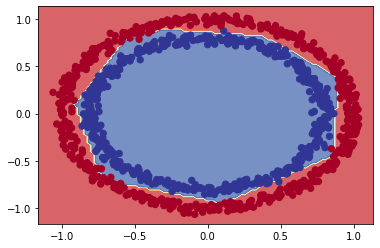

In [13]:
plot_decision_boundary(model3, X,y)

# Better model

In [14]:
#Split data
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [15]:
tf.random.set_seed(42)
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model4.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

historial4 = model4.fit(X_train,y_train, epochs=25, verbose=0)


In [16]:
loss, accuracy = model4.evaluate(X_test, y_test)
print(f'Model loss on test set: {loss}')
print(f'Model accuracy on test set: {100*accuracy:.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Model loss on test set: 0.12468848377466202
Model accuracy on test set: 100.00%


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


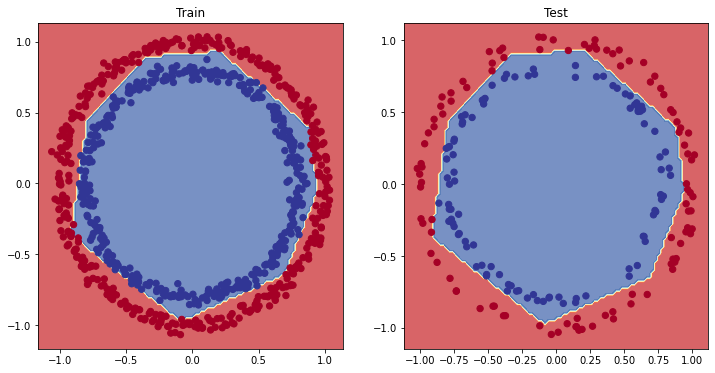

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model4, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model4, X_test, y_test)

#Plot loss

Text(0.5, 1.0, 'Model4 training curves')

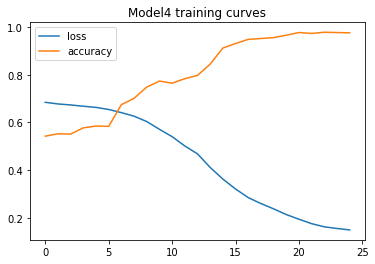

In [18]:
pd.DataFrame(historial4.history).plot()
plt.title('Model4 training curves')

#Callback


In [19]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
                            ])


model5.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history5 = model5.fit(X_train, y_train, epochs=100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

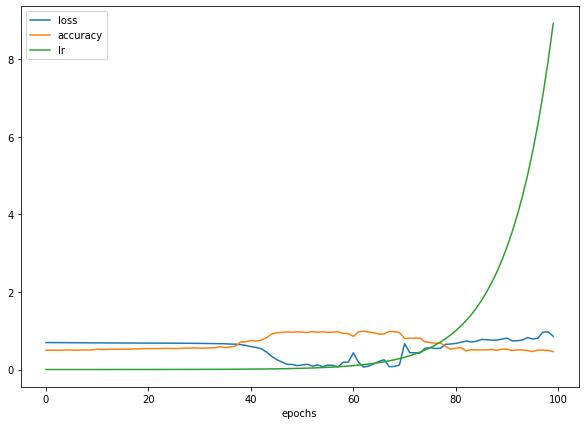

In [20]:
pd.DataFrame(history5.history).plot(figsize=(10,7), xlabel = 'epochs')

Text(0.5, 1.0, 'Learning rate vs loss')

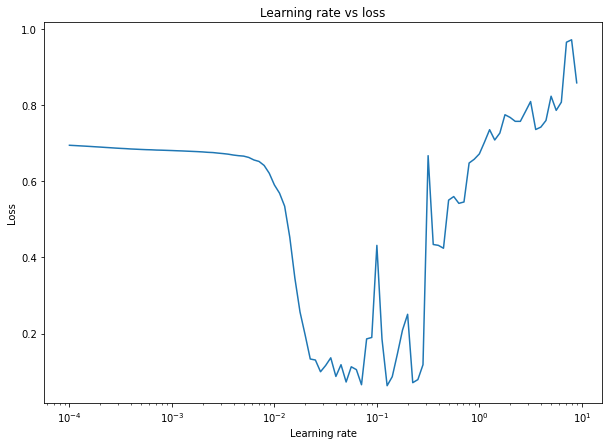

In [21]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history5.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss')

In [41]:
loss_tensor = tf.constant(history5.history['loss'])
# acc_tensor = tf.constant(history5.history['accuracy'])
point = tf.argmin(loss_tensor).numpy()
best_lr = lrs[point]

0.12589254117941676

#Model with best learning rate

In [53]:
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
                            ])


model6.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate =0.1 ),
               metrics = ['accuracy'])


history6 = model6.fit(X_train, y_train, epochs=100, verbose=0)

<Figure size 864x432 with 0 Axes>

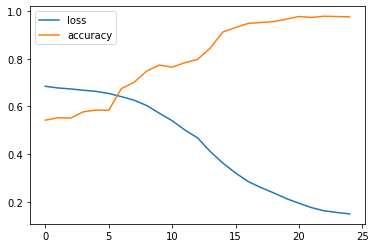

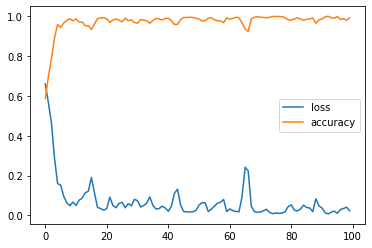

In [52]:
plt.figure(figsize=(12,6))

pd.DataFrame(historial4.history).plot()
 
pd.DataFrame(history6.history).plot()
# pd.DataFrame(history6.history).plot()


Con esto deduzco que el lr que hace el error mas bajo es el camino más rápido a hacer overfitting que tiene la red

In [22]:
#Extra
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, tf.round(y_preds))

In [57]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [62]:
print(f'Example of training dataset data: \n{train_data[0]}')
print(f'Example of training dataset label: \n{train_labels[0]}')

Example of training dataset data: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0

In [63]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

3


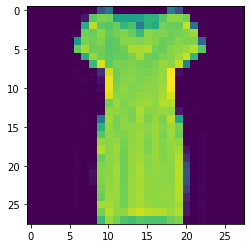

In [69]:
plt.imshow(train_data[20])
print(train_labels[20])

In [71]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10